In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [6]:
df_reviews = pd.read_csv(r"../../All-XWines_Full_100K_wines_21M_ratings/XWines_Full_21M_ratings.csv")
df_train = pd.read_csv(r"../../trainset.csv")
df_warm_warm = pd.read_csv(r"../../testset_warm_user_warm_item.csv")

C:\Users\frede\AppData\Local\Temp\ipykernel_8848\3650416035.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv(r"../../All-XWines_Full_100K_wines_21M_ratings/XWines_Full_21M_ratings.csv")


In [ ]:
# replace N.V. non-vintage with 0 to make it a categorical int
df_reviews["Vintage"] = df_reviews["Vintage"].replace("N.V.", 0)

In [5]:
reviews_type_schema = {"UserID": "categorical", "WineID": "categorical", "Vintage": "categorical"}
df_reviews_profile = ProfileReport(df_reviews, title="XWines Review Report")
df_reviews_profile.to_file("xwines_review_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:20<00:00, 43.47s/it]
C:\Users\frede\Documents\Uni_Mannheim\Master\03_Semester\Web Mining Project\xwines_recom\.venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_reviews.groupby("WineID").RatingID.count().sort_values(ascending=False)

WineID
155289    27415
179010    23626
179011    21216
111391    20913
167418    20817
          ...  
200714        5
200713        5
200712        5
200711        5
200710        5
Name: RatingID, Length: 100646, dtype: int64

In [7]:
df_reviews.groupby("WineID").RatingID.count().sort_values(ascending=False).describe()

count    100646.000000
mean        208.786599
std         588.611438
min           5.000000
25%          22.000000
50%          58.000000
75%         187.000000
max       27415.000000
Name: RatingID, dtype: float64

count    100646.000000

mean        208.786599

std         588.611438

min           5.000000

25%          22.000000

50%          58.000000

75%         187.000000

max       27415.000000
Name: RatingID, dtype: float64

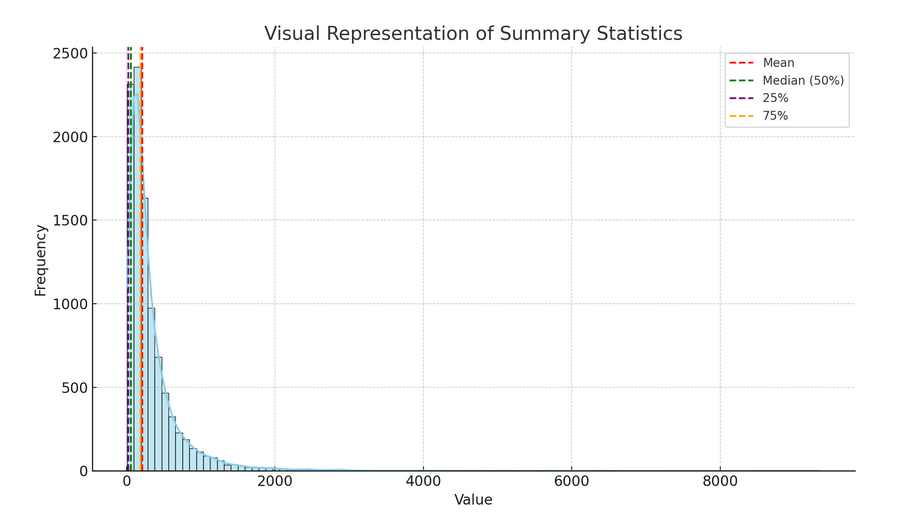

#### User

In [8]:
df_reviews.groupby("UserID").RatingID.count().describe()

count    1.056079e+06
mean     1.989769e+01
std      4.035217e+01
min      5.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      2.986000e+03
Name: RatingID, dtype: float64

The results

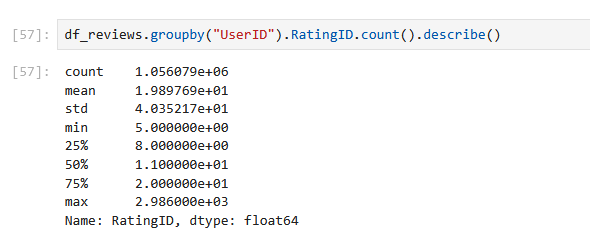

In [9]:
df_reviews.groupby("UserID").RatingID.count().sort_values(ascending=False)

UserID
1084433    2986
1034989    2979
1070878    2613
1048267    2597
1160536    2392
           ... 
2063387       5
2063348       5
2063337       5
2063354       5
2063381       5
Name: RatingID, Length: 1056079, dtype: int64

### Relations on the frequency between users and wines

In [10]:
user_wine_rating_occurences = df_reviews[["UserID", "WineID"]].value_counts()
user_wine_rating_occurences

UserID   WineID
1174177  156461    23
1127980  142757    22
2043942  120830    20
1394272  155345    19
2036081  179070    19
                   ..
2063390  179015     1
         179063     1
         179081     1
         179396     1
         188991     1
Name: count, Length: 20590800, dtype: int64

In [11]:
df_reviews.loc[df_reviews.UserID==1174177]

,RatingID,UserID,WineID,Vintage,Rating,Date
93252,93253,1174177,155515,1986,4.5,2016-06-20 12:56:12
156115,156116,1174177,155303,1992,4.0,2016-04-24 13:03:38
353431,353432,1174177,156461,1999,5.0,2021-02-06 13:05:50
554168,554169,1174177,156461,2002,5.0,2021-06-07 09:24:30
599564,599565,1174177,156461,2003,5.0,2019-06-25 08:01:13
627598,627599,1174177,156461,2003,5.0,2018-11-24 13:28:37
643031,643032,1174177,155290,2004,5.0,2020-10-21 07:29:32
690061,690062,1174177,155290,2004,5.0,2020-02-02 10:11:48
763400,763401,1174177,156461,2005,5.0,2020-10-16 09:27:24
845036,845037,1174177,111436,2005,5.0,2020-12-28 14:09:58


# Error Analysis

## Potential temporal drift

In [10]:
df_reviews["Date"] = pd.to_datetime(df_reviews["Date"])
df_reviews["Year"] = df_reviews["Date"].dt.year
df_reviews["Month"] = df_reviews["Date"].dt.month

0           2019-10-14 11:20:52
1           2019-11-28 03:36:33
2           2017-12-28 10:15:55
3           2016-06-23 02:16:22
4           2021-05-16 17:58:14
                   ...         
21013531    2019-02-16 14:15:48
21013532    2018-09-30 16:47:05
21013533    2021-01-29 19:21:14
21013534    2021-07-26 14:02:14
21013535    2016-11-17 04:48:43
Name: Date, Length: 21013536, dtype: object

In [39]:
month_average

Date
2012-01-31    3.666667
2012-02-29    3.588235
2012-03-31    4.080110
2012-04-30    3.985496
2012-05-31    3.990693
                ...   
2021-08-31    4.000128
2021-09-30    4.003396
2021-10-31    4.008089
2021-11-30    4.005212
2021-12-31    4.035310
Freq: ME, Name: Rating, Length: 120, dtype: float64

In [21]:
month_average = df_reviews.groupby(pd.Grouper(key='Date', axis=0, freq='M'))["Rating"].mean()

C:\Users\frede\AppData\Local\Temp\ipykernel_8848\3909291965.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_average = df_reviews.groupby(pd.Grouper(key='Date', axis=0, freq='M'))["Rating"].mean()


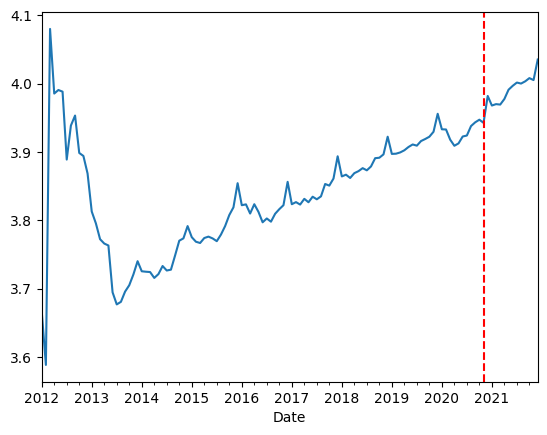

In [50]:
month_average.plot.line()
plt.axvline(x="2020-11-13", color='r', linestyle="--", label="Start test segments")

In [33]:
df_warm_warm.Date.min()

'2020-11-13 18:19:45'

In [35]:
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train_month_count = df_train.groupby(pd.Grouper(key='Date', axis=0, freq='M'))["Rating"].count()

C:\Users\frede\AppData\Local\Temp\ipykernel_8848\3392185638.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_train_month_count = df_train.groupby(pd.Grouper(key='Date', axis=0, freq='M'))["Rating"].count()


<Axes: xlabel='Date'>

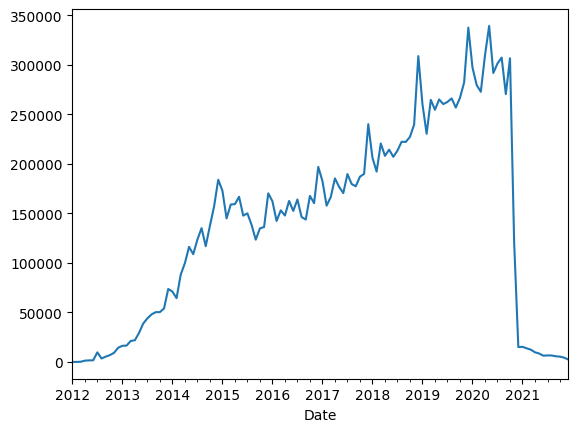

In [37]:
df_train_month_count.plot.line()

In [25]:
plt.bar(x=month_average.Date, height=month_average)

AttributeError: 'Series' object has no attribute 'Date'